In [52]:
library(CausalImpact)

In [193]:
filename <- 'generated/causal/Pylons_pyramid.csv'

TimeSeriesData <- read.csv(file=filename, header=TRUE, sep=",")

summary(TimeSeriesData)

                       ProjectName        Language   ShareReviewComments
 apache/storm                : 45   C++       :225   Min.   :0.00000    
 appcelerator/alloy          : 45   Java      :135   1st Qu.:0.04167    
 appcelerator/titanium_mobile: 45   Python    :135   Median :0.18275    
 astaxie/beego               : 45   C         : 90   Mean   :0.22393    
 Automattic/_s               : 45   CSS       : 90   3rd Qu.:0.33333    
 Baystation12/Baystation12   : 45   JavaScript: 90   Max.   :1.00000    
 (Other)                     :720   (Other)   :225                      
   Additions           Deletions          ChangedFiles       Assignees     
 Min.   :      0.0   Min.   :      0.0   Min.   :    0.0   Min.   : 0.000  
 1st Qu.:    488.8   1st Qu.:    133.0   1st Qu.:   28.0   1st Qu.: 0.000  
 Median :   2184.5   Median :    744.5   Median :   91.0   Median : 0.000  
 Mean   :  44278.2   Mean   :  16587.9   Mean   :  497.2   Mean   : 2.304  
 3rd Qu.:  12062.8   3rd Qu.:   4794

In [194]:
append_vars_to_frame <- function(targetFrame, originFrame, projectName, i) {
    
    targetFrame[,paste('Additions', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Additions
    targetFrame[,paste('Deletions', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Deletions
    targetFrame[,paste('ChangedFiles', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$ChangedFiles
    targetFrame[,paste('Assignees', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Assignees
    targetFrame[,paste('TotalPrs', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$TotalPrs
    targetFrame[,paste('Commits', i, sep='')] = originFrame[originFrame$ProjectName==projectName,]$Commits

    return(targetFrame)
}

In [195]:
dataSubset <- TimeSeriesData[TimeSeriesData$ProjectName=="Pylons/pyramid",
                             c('GeneralComments','Additions','Deletions','ChangedFiles', 'Assignees', 'TotalPrs', 'Commits')]

dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'astaxie/beego', "1")
dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'Automattic/_s', "2")
dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'apache/storm', "3")
dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'appcelerator/alloy', "4")
dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'appcelerator/titanium_mobile', "5")
dataSubset <- append_vars_to_frame(dataSubset, TimeSeriesData, 'Baystation12/Baystation12', "6")

data <- data.matrix(dataSubset)

head(data)

,GeneralComments,Additions,Deletions,ChangedFiles,Assignees,TotalPrs,Commits,Additions1,Deletions1,ChangedFiles1,⋯,ChangedFiles5,Assignees5,TotalPrs5,Commits5,Additions6,Deletions6,ChangedFiles6,Assignees6,TotalPrs6,Commits6
1,13,256,102,14,0,11,16,228,121,17,⋯,200,15,44,186,35609,38210,761,0,44,322
2,1,3,3,2,0,2,2,2088,536,50,⋯,1336,29,68,829,43941,41561,180,0,66,255
3,25,34,5,5,0,7,13,148,33,15,⋯,861,26,88,776,61128,56175,807,0,29,358
4,6,203,4,11,0,3,8,1,0,1,⋯,277,22,87,506,1363,614,114,0,24,133
5,12,8,2,1,0,4,12,164,56,6,⋯,790,22,75,127,34401,29992,872,0,27,361
6,15,0,0,0,0,4,7,414,114,33,⋯,129,13,68,124,217250,173794,3052,0,41,1170


In [196]:
pre.period <- c(1,30)
post.period <- c(31,45)

impact <- CausalImpact(data, pre.period, post.period)

Warning message:
“Removed 45 rows containing missing values (geom_path).”Warning message:
“Removed 90 rows containing missing values (geom_path).”

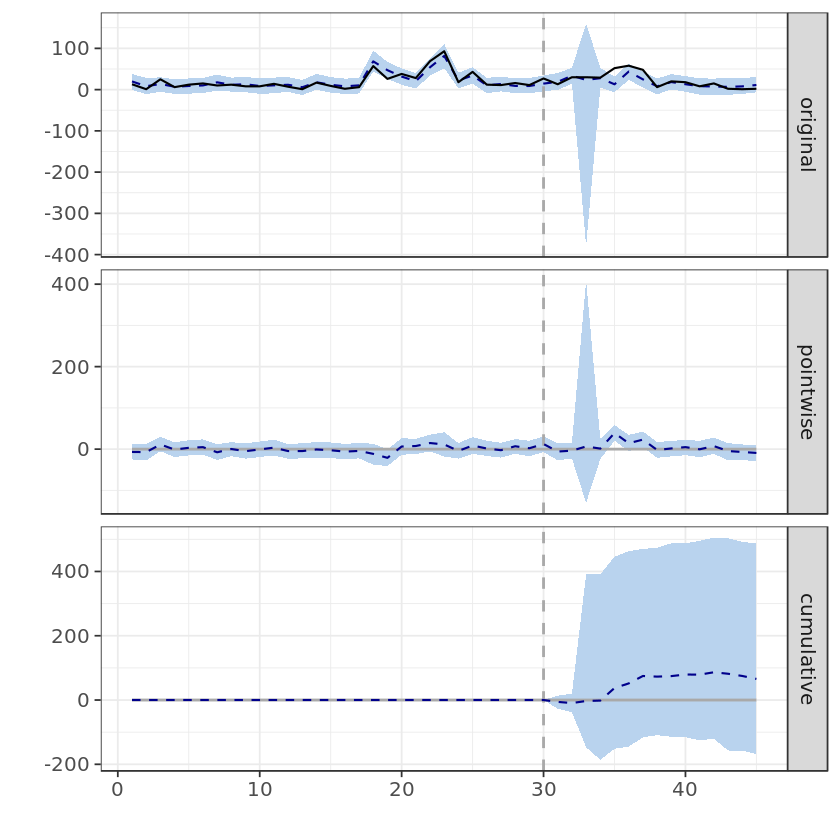

In [197]:
plot(impact)

In [198]:
summary(impact)

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   22             332         
Prediction (s.d.)        18 (12)        266 (174)   
95% CI                   [-10, 33]      [-155, 500] 
                                                    
Absolute effect (s.d.)   4.4 (12)       65.7 (174)  
95% CI                   [-11, 32]      [-168, 487] 
                                                    
Relative effect (s.d.)   25% (65%)      25% (65%)   
95% CI                   [-63%, 183%]   [-63%, 183%]

Posterior tail-area probability p:   0.13292
Posterior prob. of a causal effect:  87%

For more details, type: summary(impact, "report")



In [199]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 22.13. In the absence of an intervention, we would have expected an average response of 17.75. The 95% interval of this counterfactual prediction is [-10.32, 33.35]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 4.38 with a 95% interval of [-11.22, 32.45]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 332.00. Had the intervention not taken place, we would have expected a sum of 266.30. The 95% interval of this prediction is [-154.75, 500.25].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +